# To predict the optimum number of clusters and represent it visually,of the given data set

In [2]:
#Importing the libraries required for this notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

#Now Loading  the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(12)     #See the first 12 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## In order to implement the K-Means clustering, we need to find the optimal number of clusters in which customers will be placed. 
<br>

## To find the optimal number of clusters for K-Means, the Elbow method is used based on Within-Cluster-Sum-of-Squares (WCSS)

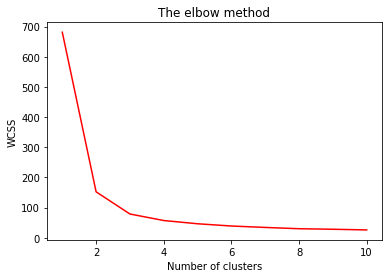

In [7]:
#Finding the optimum number of clusters for k-means classification
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)   
#Plotting the results onto a line graph, 
#allowing us to observe 'The elbow'
plt.plot(range(1, 11),wcss,  color = 'red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')   #Within cluster sum of squares
plt.show()

## In the above plot, the elbow seems to be on point 5 of X-axis. So, the optimal number of clusters will be 3 for the K-Means algorithm.

<br>

## After finding the optimal number of clusters, fit the K-Means clustering model to the dataset defined in the second step and then predict clusters for each of the data elements. It means it will predict which of the 5 clusters the data item will belong to.

In [9]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

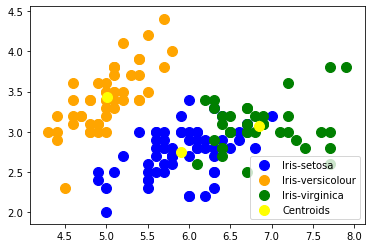

In [10]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# Now using Hierarchical clustering

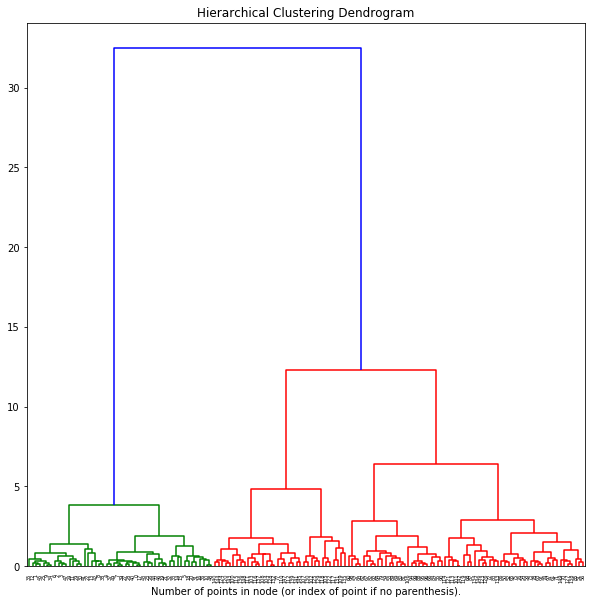

In [14]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()